# Pollution and mental performance in BCN

## Inicialització

In [3]:
import warnings
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

df = pd.read_csv('CitieSHealth_BCN_DATA_PanelStudy_20220414.csv')

## Anàlisi exploratori de dades inicial

In [5]:
print(f"Les seves dimensions són: {df.shape[0]} individus i {df.shape[1]} variables")
print(f"Llistat de variables: {list(df.columns)}")

Les seves dimensions són: 3348 individus i 95 variables
Llistat de variables: ['ID_Zenodo', 'date_all', 'year', 'month', 'day', 'dayoftheweek', 'hour', 'mentalhealth_survey', 'occurrence_mental', 'bienestar', 'energia', 'estres', 'sueno', 'horasfuera', 'actividadfisica', 'ordenador', 'dieta', 'alcohol', 'drogas', 'bebida', 'enfermo', 'otrofactor', 'stroop_test', 'occurrence_stroop', 'mean_incongruent', 'correct', 'response_duration_ms', 'performance', 'mean_congruent', 'inhib_control', 'z_performance', 'z_mean_incongruent', 'z_inhib_control', 'no2bcn_24h', 'no2bcn_12h', 'no2gps_24h', 'no2gps_12h', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30', 'no2gps_24h_x30', 'min_gps', 'hour_gps', 'pm25bcn', 'BCμg', 'sec_noise55_day', 'sec_noise65_day', 'sec_greenblue_day', 'hours_noise_55_day', 'hours_noise_65_day', 'hours_greenblue_day', 'tmean_24h', 'tmean_12h', 'humi_24h', 'humi_12h', 'pressure_24h', 'pressure_12h', 'precip_24h', 'precip_12h', 'precip_12h_binary', 'precip_24h_binary', 'ma

Codifiquem algunes variables com a categòriques, i n'eliminem algunes ja que no són rellevants o contenen informació repetida en altres.
Més endavant valorarem si, estudiant les correlacions, cal treure'n més.

In [6]:
list_to_cat = ['ID_Zenodo', 'year', 'month', 'day', 'dayoftheweek', 'hour',
               'mentalhealth_survey', 'bienestar', 'energia', 'estres', 'sueno', 
               'occurrence_stroop', 'precip_12h_binary', 'precip_24h_binary',
               'noise_total_LDEN_55']

for name in list_to_cat:
    df[name] = df[name].astype('category')

In [7]:
covid = ['covid_work', 'covid_mood', 'covid_sleep', 'covid_espacios', 'covid_aire',
                'covid_motor', 'covid_electric', 'covid_bikewalk', 'covid_public_trans']

In [8]:
eliminations = ['date_all', 'mean_incongruent', 'correct', 'response_duration_ms',
                'mean_congruent', 'performance', 'inhib_control', 'z_mean_incongruent',
                'z_inhib_control', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30',
                'no2gps_24h_x30', 'min_gps', 'hour_gps', 'sec_noise55_day', 'sec_noise65_day',
                'sec_greenblue_day', 'Houron', 'Houroff', 'start_day', 'start_month', 'start_year',
                'start_hour', 'end_day', 'end_month', 'end_year', 'end_hour', 'Totaltime', 
                'Totaltime_estimated']
df = df.drop(eliminations, axis=1)

Procedim a realitzar alguns gràfics

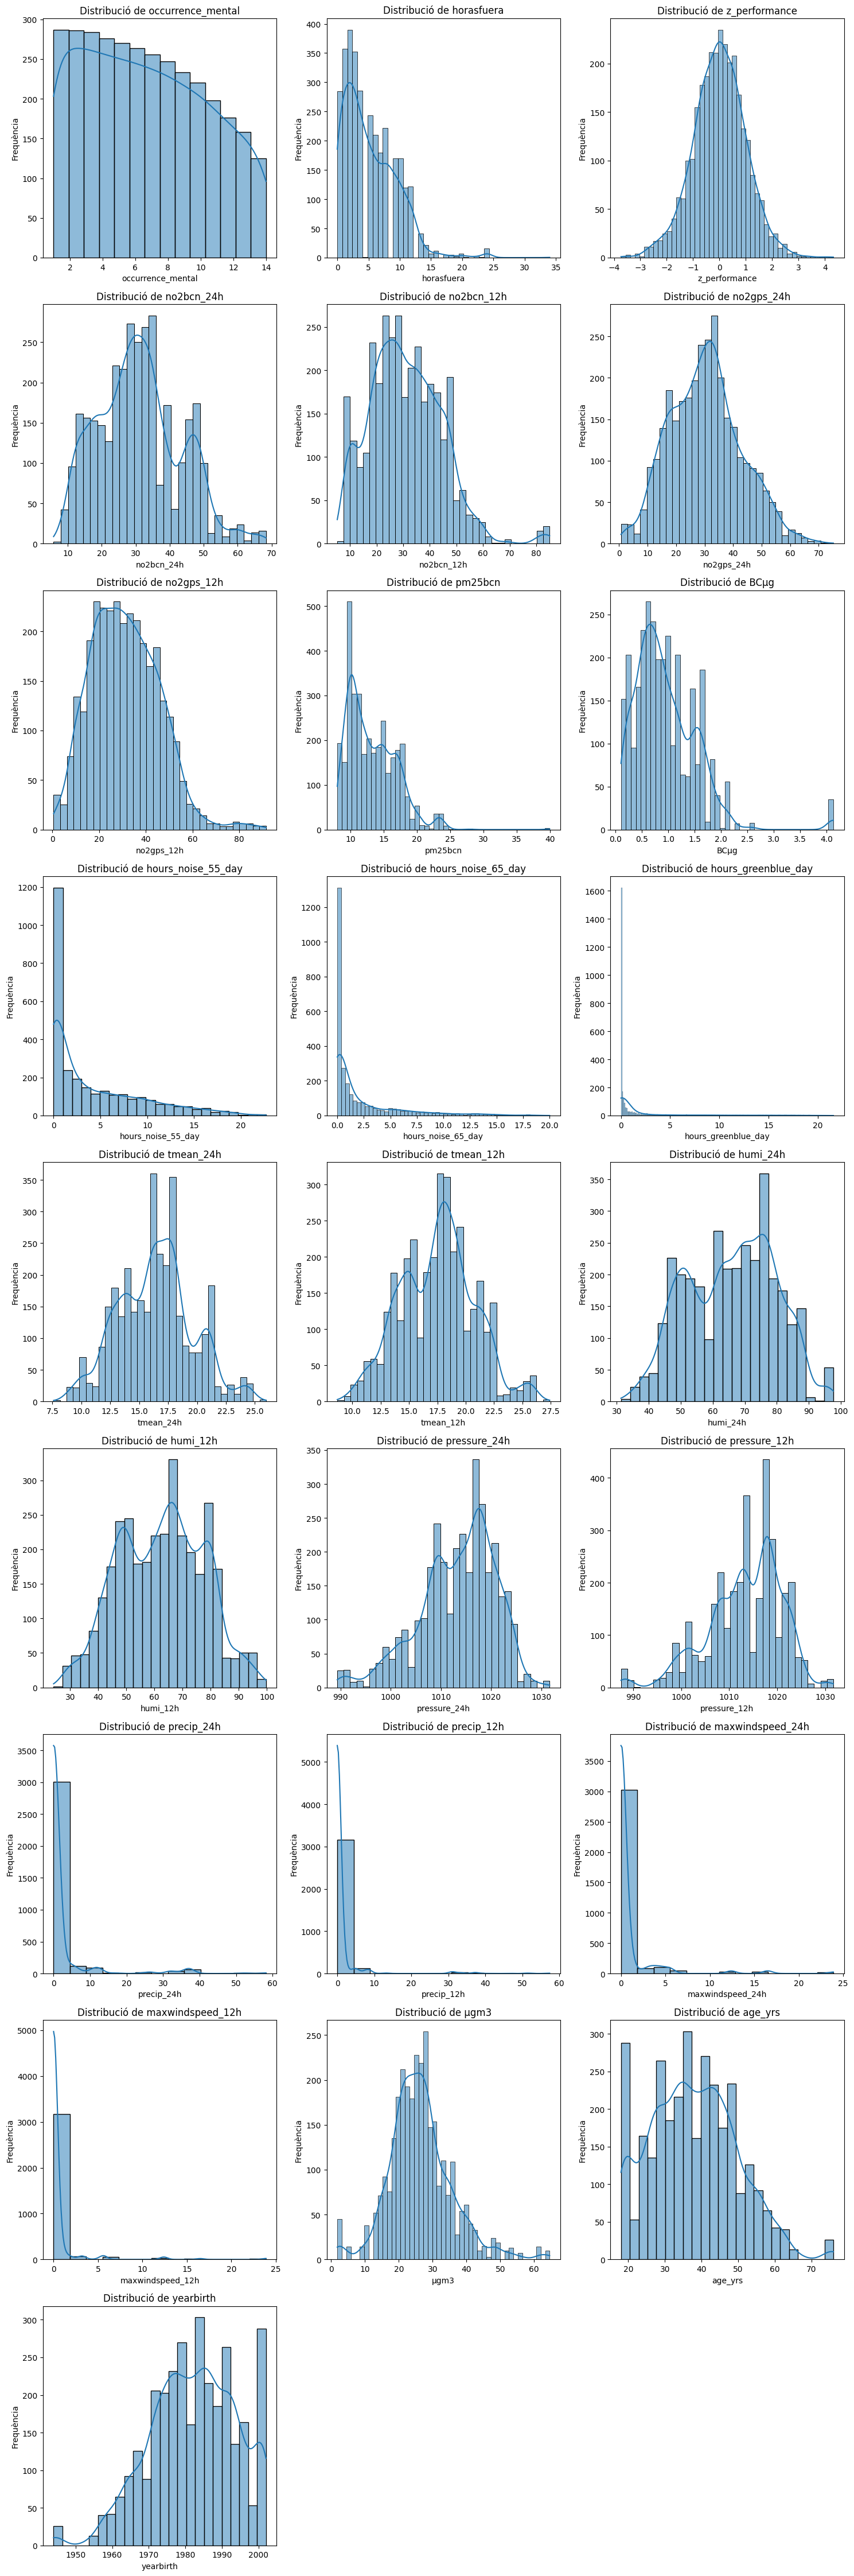

In [9]:
# Gráfics de distribució per variables numèriques
num_cols = df.select_dtypes(include='number').columns
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 3)

fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
axs = axs.ravel()  

for i in range(len(axs)):
    if i < len(num_cols):
        sns.histplot(df[num_cols[i]], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribució de {num_cols[i]}')
        axs[i].set_xlabel(num_cols[i])
        axs[i].set_ylabel('Frequència')
    else:
        fig.delaxes(axs[i]) 

plt.tight_layout()
plt.show()


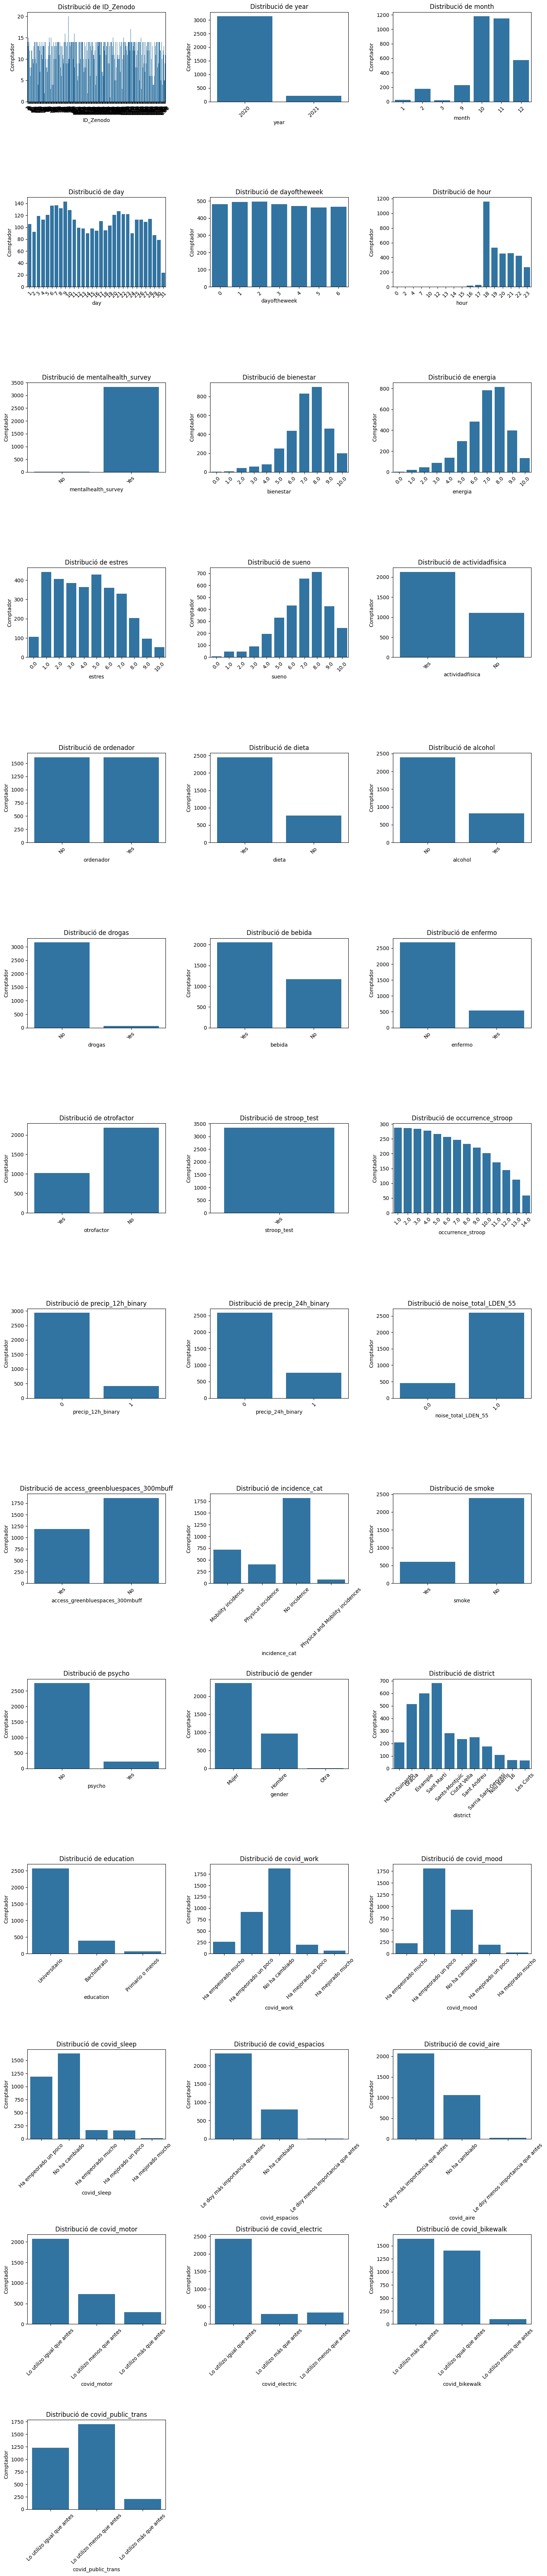

In [10]:
# Gráfics de barres per variables categòriques
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_plots = len(cat_cols)
cat_rows = math.ceil(cat_plots / 3)

fig, axs = plt.subplots(cat_rows, 3, figsize=(15, cat_rows*5))
axs = axs.ravel() 

for i in range(len(axs)):
    if i < len(cat_cols):
        sns.countplot(data=df, x=cat_cols[i], ax=axs[i])
        axs[i].set_title(f'Distribució de {cat_cols[i]}')
        axs[i].set_xlabel(cat_cols[i])
        axs[i].set_ylabel('Comptador')
        axs[i].tick_params(axis='x', rotation=45)
    else:
        fig.delaxes(axs[i])  

plt.tight_layout()
plt.show()

Visualitzem els missing values per variable

,missing_values
occurrence_mental,68
bienestar,75
energia,141
estres,175
sueno,158
horasfuera,117
actividadfisica,116
ordenador,121
dieta,122
alcohol,126


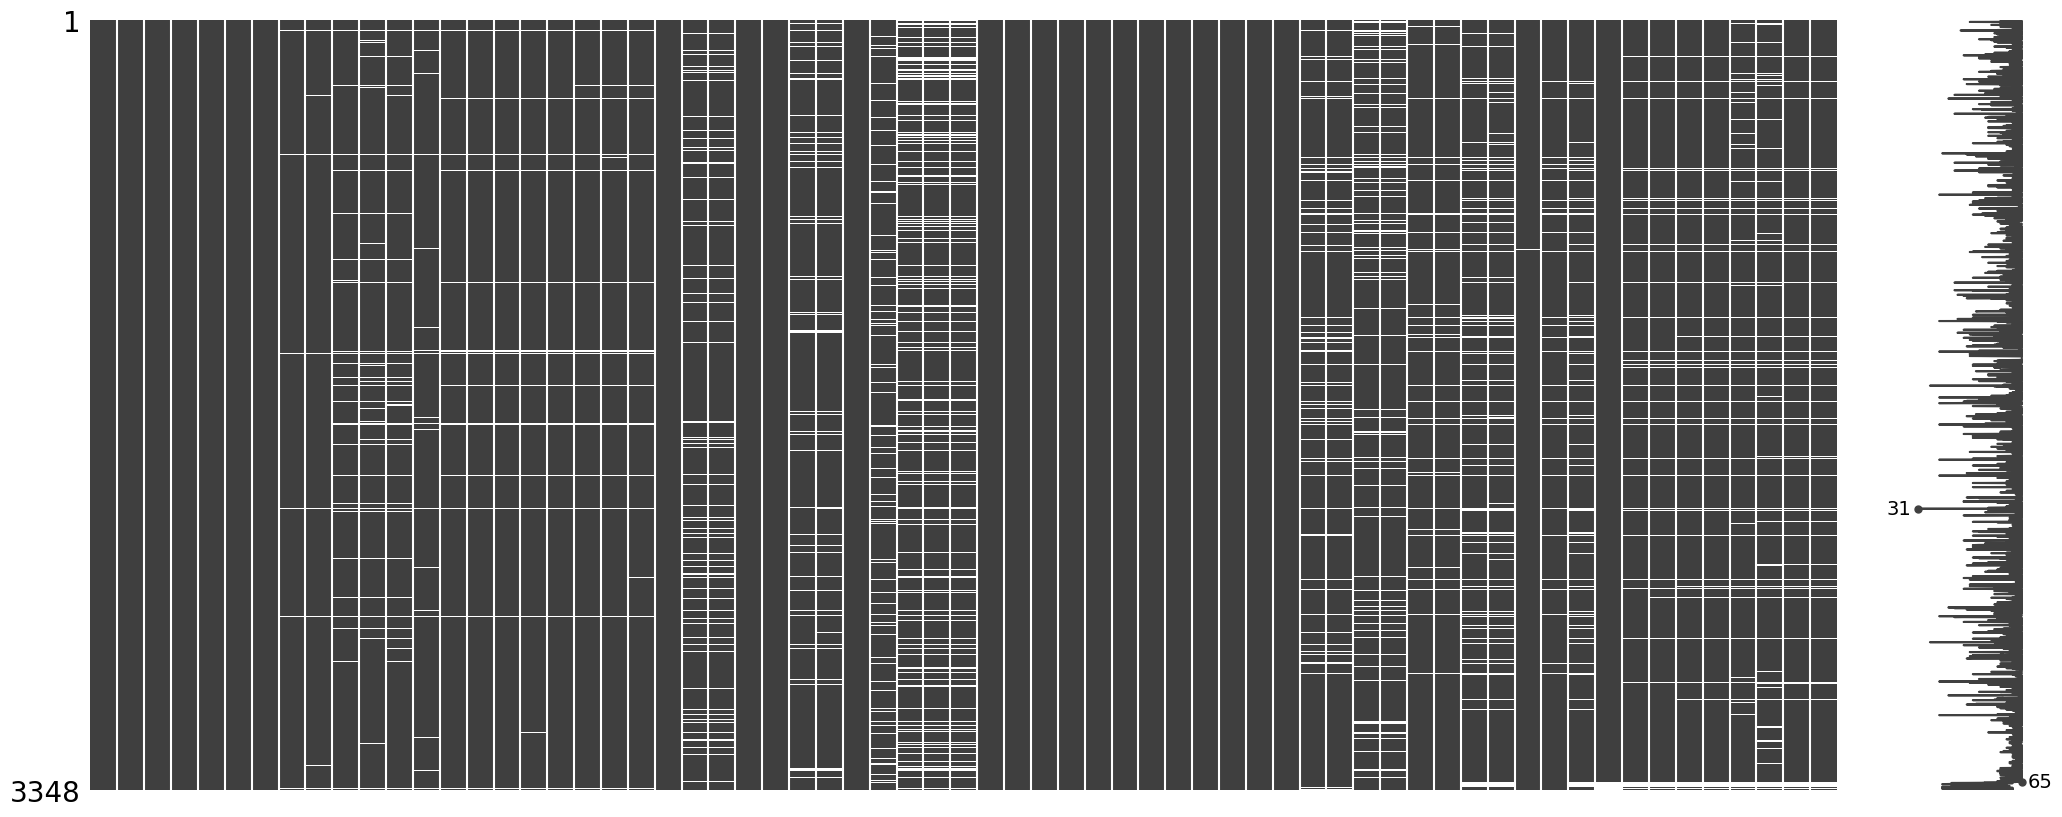

In [11]:
import missingno as msno
msno.matrix(df)

missing_values1 = df.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

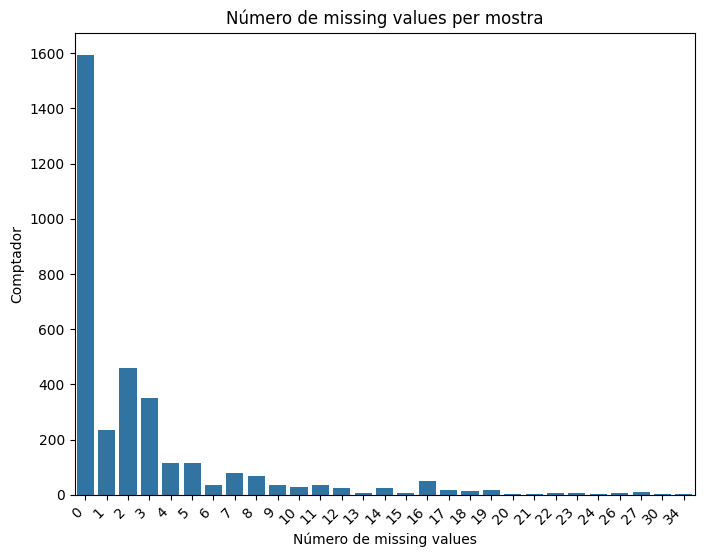

In [12]:
# Barplot amb el numero de missing values per fila 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=df.isnull().sum(axis=1))
plt.title(f'Número de missing values per mostra')
plt.xlabel('Número de missing values')
plt.ylabel('Comptador')
plt.xticks(rotation=45, ha='right')  # Rotar les etiquetes de l'eix x per a una major llegibilitat
plt.show()


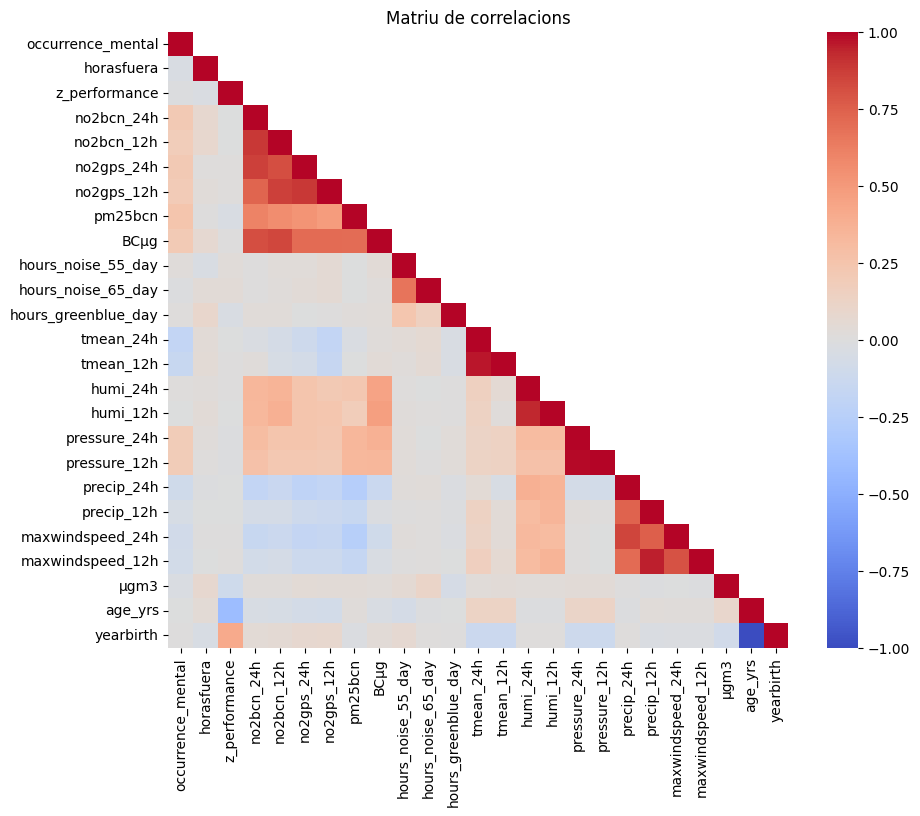

In [13]:
# Creem un nou DataFrame només amb les variables numèriques
df_numeric = df.select_dtypes(include=[np.number])

# Calculem la matriu de correlació
corr = df_numeric.corr()

# Creem una màscara per a la part superior del triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Plotejem la matriu de correlació
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm')
plt.title('Matriu de correlacions')
plt.show()

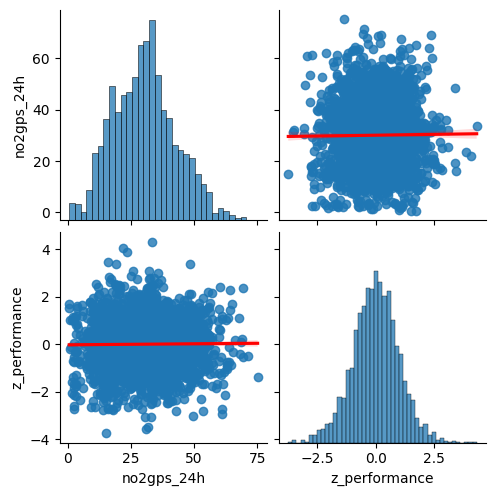

In [14]:
df_numeric = df[['no2gps_24h', 'z_performance']]
sns.pairplot(df_numeric, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

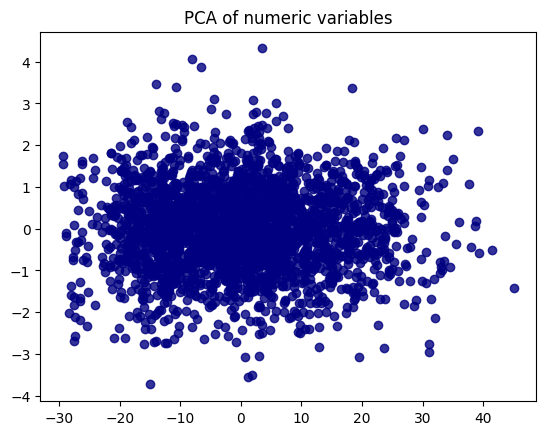

In [20]:
pca = PCA(n_components=2)

no_miss = df_numeric.dropna()
X_r = pca.fit_transform(no_miss)

# Plot PCA results
plt.figure()

plt.scatter(X_r[:, 0], X_r[:, 1], color='navy', alpha=.8)
plt.title('PCA of numeric variables')

plt.show()

## Preprocessament

Eliminem els missing de performance

In [40]:
deleted_na_perf = df.dropna(subset="z_performance")

missing_values1 = deleted_na_perf.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

,missing_values
occurrence_mental,68
bienestar,75
energia,139
estres,170
sueno,155
horasfuera,112
actividadfisica,114
ordenador,119
dieta,120
alcohol,123


Usem un imputador per emplenar la resta de missings

In [41]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

num_cols = deleted_na_perf.select_dtypes(include='number').columns

numeric_delna = deleted_na_perf[num_cols]
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(numeric_delna)

deleted_na_perf[num_cols] = imp_mean.transform(numeric_delna)

Ens queden les categòriques. Emplenem amb la moda

In [42]:
for col in deleted_na_perf.columns:
    deleted_na_perf[col] = deleted_na_perf[col].fillna(value=deleted_na_perf[col].mode()[0])

Eliminem les variables amb molta correlació o que no ens interessen

In [45]:
not_interessting = ['yearbirth', 'year', 'month', 'day', 'hour', 'mentalhealth_survey', 'stroop_test', 'µgm3']
deleted_na_perf = deleted_na_perf.drop(covid, axis=1)
deleted_na_perf = deleted_na_perf.drop(not_interessting, axis=1)
deleted_na_perf

KeyError: "['covid_work', 'covid_mood', 'covid_sleep', 'covid_espacios', 'covid_aire', 'covid_motor', 'covid_electric', 'covid_bikewalk', 'covid_public_trans'] not found in axis"

Escalem les variables

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = deleted_na_perf.select_dtypes(include='number').columns
deleted_na_perf[num_cols] = scaler.fit_transform(deleted_na_perf[num_cols])

Detectem outliers usant un Isolation Forest

In [53]:
from sklearn.ensemble import IsolationForest

outliers = IsolationForest(random_state=0).fit(deleted_na_perf[num_cols])

deleted_na_perf['Outlier'] = outliers

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(X[X['Outlier'] == -1]['PCA Component 1'],
            X[X['Outlier'] == -1]['PCA Component 2'],
            color='red', label='Outliers')
plt.scatter(X[X['Outlier'] == 1]['PCA Component 1'],
            X[X['Outlier'] == 1]['PCA Component 2'],
            color='blue', label='Inliers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Outliers Detected by Isolation Forest in PCA Space')
plt.legend()
plt.show()

AttributeError: 'IsolationForest' object has no attribute 'plot'